Đã load dữ liệu: 33819106 dòng


C:\Users\Nguyen Kim Vu\AppData\Local\Temp\ipykernel_13780\1598004798.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_df, x="count", y="product_name", palette="viridis")


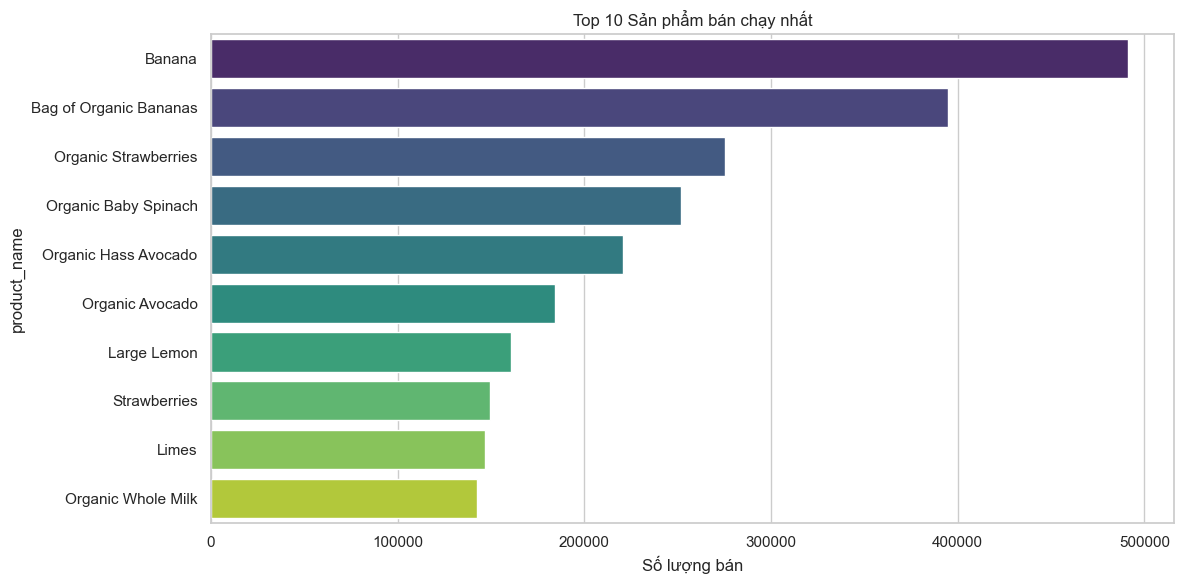

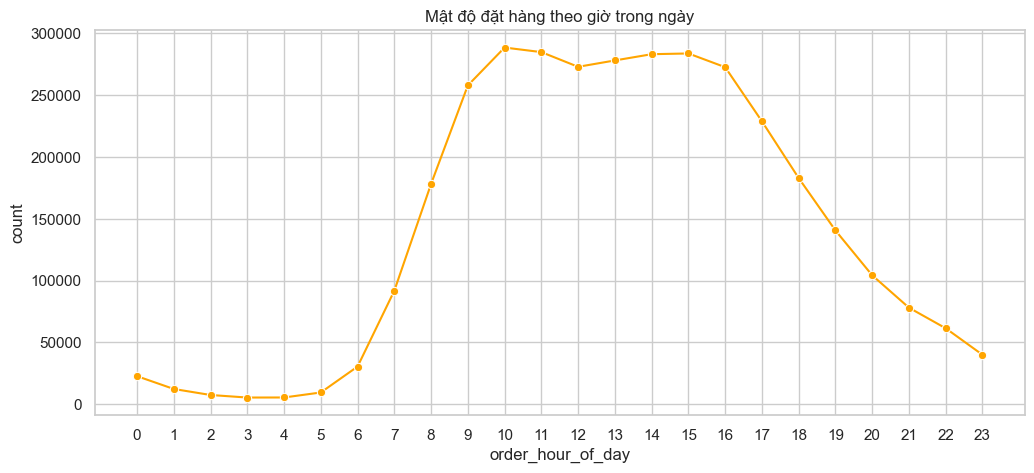

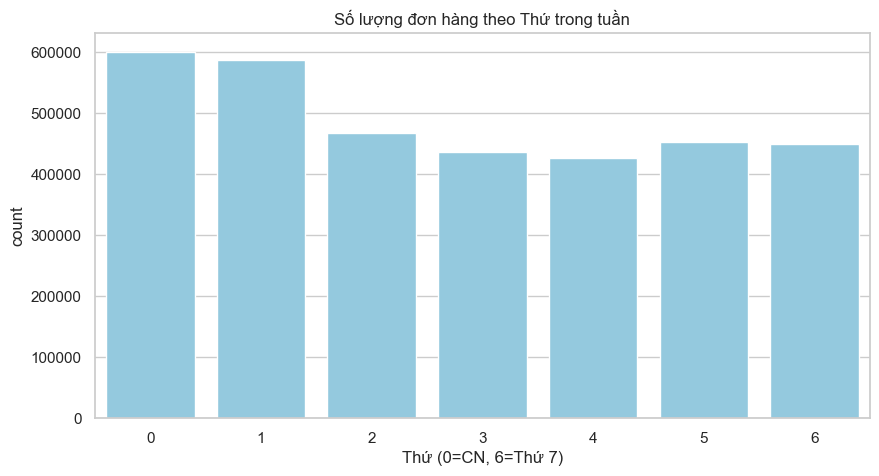

C:\Users\Nguyen Kim Vu\AppData\Local\Temp\ipykernel_13780\1598004798.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=days_since.head(30), x="days_since_prior_order", y="count", palette="magma")


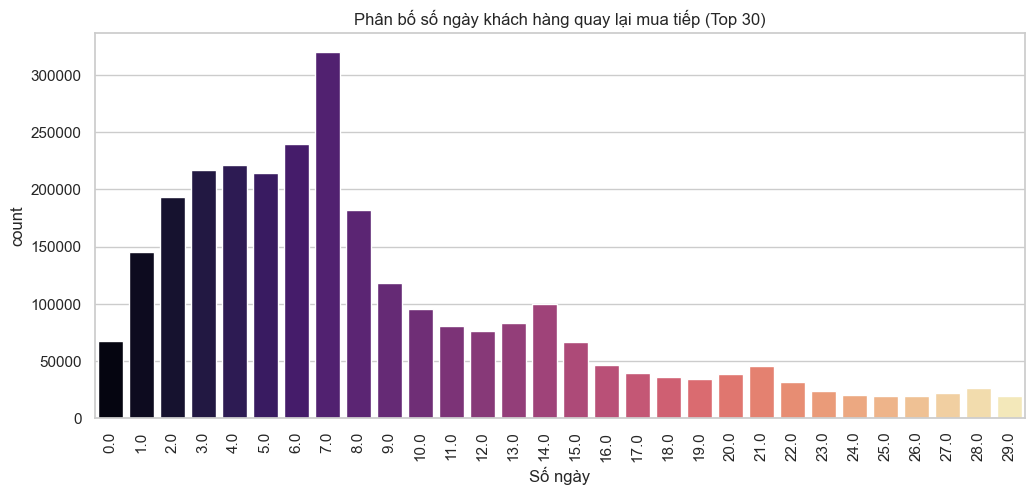

C:\Users\Nguyen Kim Vu\AppData\Local\Temp\ipykernel_13780\1598004798.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_aisles_by_aisle, x="count", y="aisle_id", palette="coolwarm")


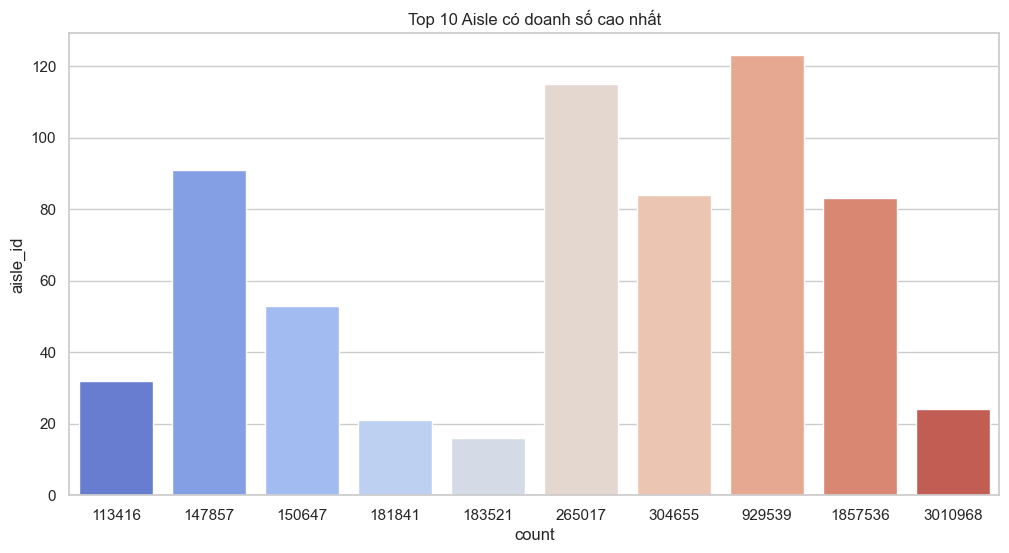

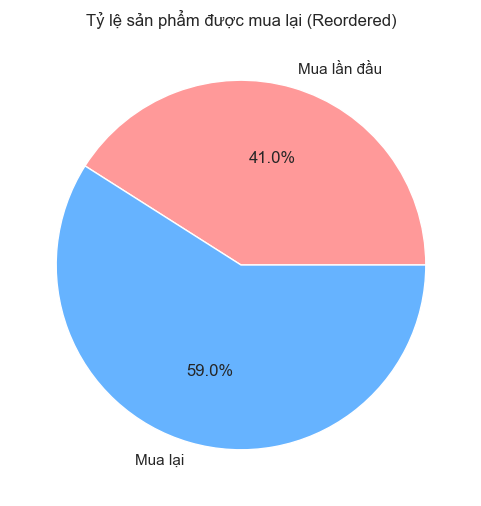

Đã vẽ xong 6 biểu đồ và lưu vào thư mục images/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dữ liệu 
df_orders = pd.read_csv("../data/raw/orders.csv")
df_products = pd.read_csv("../data/raw/products.csv")
df_op_prior = pd.read_csv("../data/raw/order_products__prior.csv")
df_op_train = pd.read_csv("../data/raw/order_products__train.csv")

# Gộp bảng order_products
df_order_products = pd.concat([df_op_prior, df_op_train], ignore_index=True)

print(f"Đã load dữ liệu: {len(df_order_products)} dòng")

# Cấu hình hiển thị biểu đồ chung
sns.set_theme(style="whitegrid")

# --- BIỂU ĐỒ 1: TOP 10 SẢN PHẨM BÁN CHẠY NHẤT ---
top_products = df_order_products['product_id'].value_counts().head(10)
top_products_df = pd.DataFrame({
    'product_id': top_products.index,
    'count': top_products.values
}).merge(df_products[['product_id', 'product_name']], on='product_id')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_df, x="count", y="product_name", palette="viridis")
plt.title("Top 10 Sản phẩm bán chạy nhất")
plt.xlabel("Số lượng bán")
plt.tight_layout()
plt.savefig("../images/1_top_products.png")
plt.show()

# --- BIỂU ĐỒ 2: SỐ LƯỢNG ĐƠN HÀNG THEO GIỜ TRONG NGÀY ---
orders_by_hour = df_orders.groupby("order_hour_of_day").size().reset_index(name="count")

plt.figure(figsize=(12, 5))
sns.lineplot(data=orders_by_hour, x="order_hour_of_day", y="count", marker="o", color="orange")
plt.title("Mật độ đặt hàng theo giờ trong ngày")
plt.xticks(range(0, 24))
plt.grid(True)
plt.savefig("../images/2_orders_by_hour.png")
plt.show()

# --- BIỂU ĐỒ 3: SỐ LƯỢNG ĐƠN HÀNG THEO THỨ TRONG TUẦN ---
# 0: Chủ nhật, 1: Thứ 2...
orders_by_dow = df_orders.groupby("order_dow").size().reset_index(name="count")

plt.figure(figsize=(10, 5))
sns.barplot(data=orders_by_dow, x="order_dow", y="count", color="skyblue")
plt.title("Số lượng đơn hàng theo Thứ trong tuần")
plt.xlabel("Thứ (0=CN, 6=Thứ 7)")
plt.savefig("../images/3_orders_by_dow.png")
plt.show()

# --- BIỂU ĐỒ 4: SỐ NGÀY GIỮA CÁC LẦN MUA HÀNG ---
days_since = df_orders[df_orders["days_since_prior_order"].notna()].groupby("days_since_prior_order").size().reset_index(name="count")
days_since = days_since.sort_values("days_since_prior_order")

plt.figure(figsize=(12, 5))
sns.barplot(data=days_since.head(30), x="days_since_prior_order", y="count", palette="magma")
plt.title("Phân bố số ngày khách hàng quay lại mua tiếp (Top 30)")
plt.xlabel("Số ngày")
plt.xticks(rotation=90)
plt.savefig("../images/4_days_since_prior.png")
plt.show()

# --- BIỂU ĐỒ 5: TOP 10 NGÀNH HÀNG PHỔ BIẾN ---
top_aisles = df_order_products['product_id'].value_counts().head(100)
top_aisles_df = pd.DataFrame({
    'product_id': top_aisles.index,
    'count': top_aisles.values
}).merge(df_products[['product_id', 'aisle_id']], on='product_id')

top_aisles_by_aisle = top_aisles_df.groupby('aisle_id')['count'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_aisles_by_aisle, x="count", y="aisle_id", palette="coolwarm")
plt.title("Top 10 Aisle có doanh số cao nhất")
plt.savefig("../images/5_top_aisles.png")
plt.show()

# --- BIỂU ĐỒ 6: TỶ LỆ ORDER LẠI ---
reorder_counts = df_order_products['reordered'].value_counts()
labels = ['Mua lần đầu', 'Mua lại']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie([reorder_counts.get(0, 0), reorder_counts.get(1, 0)], labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Tỷ lệ sản phẩm được mua lại (Reordered)")
plt.savefig("../images/6_reordered_ratio.png")
plt.show()

print("Đã vẽ xong 6 biểu đồ và lưu vào thư mục images/")